## Hattracks Histograms (Monte-Carlo True)

**Definition of ND280:**

In [1]:
import uproot
import awkward as ak
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class ND280_dataset:
    def __init__(self, path):
        tree_hattracks = uproot.open(path)['hattracks']
        
        df = tree_hattracks.arrays()
        tree = ak.to_dataframe(df)
        keys = tree.index.get_level_values('entry').unique()
        
        self.tree = tree
        self.keys = keys
        
    def __getitem__(self, i):
        key = self.keys[i]
        return self.tree.loc[key]
    
    def __len__(self):
        return len(self.keys)

In [4]:
path = "/nfs/pic.es/user/e/eriksen/data/pilar/treemaker.root"

In [5]:
ds = ND280_dataset(path)

In [6]:
len(ds)

7618

In [7]:
ds[1]

,event,track,nhits,hat_start_pos,hat_end_pos,track_start,mom
subentry,,,,,,,
0,1,1,319,-602.045349,-594.897095,-602.794922,-0.001574
1,1,1,319,470.569275,1124.036377,254.820084,428.511566
2,1,1,319,-1725.385010,-2674.908691,-1453.342896,-525.237061
3,1,1,319,690.999451,694.896545,689.826355,686.046509


In [8]:
ds[2]

,event,track,nhits,hat_start_pos,hat_end_pos,track_start,mom
subentry,,,,,,,
0,2,1,113,-598.890869,-599.721558,-598.219971,-0.002366
1,2,1,113,489.873077,846.973328,253.698563,644.104675
2,2,1,113,-2695.740967,-2771.384277,-2652.020752,-119.990852
3,2,1,113,2995.585693,2996.819824,2994.773926,663.650757


In [9]:
ds[0]['event']

subentry
0    0
1    0
2    0
3    0
Name: event, dtype: int32


**Convert ds.tree object to a Pandas DataFrame and extract a column:**

In [10]:
df = pd.DataFrame(ds.tree)

* track start:

In [11]:
df['track_start']

entry  subentry
0      0           -600.205811
       1            254.449692
       2          -2123.953613
       3           3005.562988
1      0           -602.794922
                      ...     
7616   3           1829.779053
7617   0           -606.541931
       1            241.912125
       2          -1959.229492
       3            675.724670
Name: track_start, Length: 30472, dtype: float32

In [12]:
track_start_values = df['track_start'].values
track_start_values

array([ -600.2058 ,   254.44969, -2123.9536 , ...,   241.91212,
       -1959.2295 ,   675.7247 ], dtype=float32)

In [13]:
len(track_start_values)

30472

In [14]:
track_x=track_start_values[::4]
print(track_x)

[-600.2058  -602.7949  -598.22    ... -598.1442  -591.53186 -606.54193]


In [15]:
track_y=track_start_values[1::4]
print(track_y)

[254.44969 254.82008 253.69856 ... 251.46562 254.45602 241.91212]


In [16]:
track_z=track_start_values[2::4]
print(track_z)

[-2123.9536 -1453.3429 -2652.0208 ... -2131.4885 -1460.4421 -1959.2295]


Using  $track_{start} = \sqrt{track_x^2 + track_y^2 + track_z^2}$ :

In [17]:
track_module=np.sqrt(track_x**2+track_y**2+track_z**2)
track_module

array([2221.7495, 1593.8948, 2730.4658, ..., 2228.0608, 1596.1044,
       2065.1865], dtype=float32)

In [18]:
subentry3_track=track_start_values[3::4]
subentry3_track

array([3005.563  ,  689.82635, 2994.774  , ..., 1249.2415 , 1829.779  ,
        675.7247 ], dtype=float32)

* hat end pos:

In [19]:
hat_end_pos_values= df['hat_end_pos'].values

In [20]:
hat_end_pos_values

array([ -595.5952 ,  1095.478  , -2756.6863 , ...,  1092.5408 ,
       -1112.2549 ,   679.75525], dtype=float32)

In [21]:
len(hat_end_pos_values)

30472

In [22]:
hat_end_x=hat_end_pos_values[::4]
print(hat_end_x)

[-595.5952  -594.8971  -599.72156 ... -596.0165  -582.0097  -611.23914]


In [23]:
hat_end_y=hat_end_pos_values[1::4]
print(hat_end_y)

[1095.478  1124.0364  846.9733 ... 1111.6575 1119.5431 1092.5408]


In [24]:
hat_end_z=hat_end_pos_values[2::4]
print(hat_end_z)

[-2756.6863 -2674.9087 -2771.3843 ... -1909.0309 -1673.0763 -1112.2549]


Using  $hat_{end pos} = \sqrt{hat_{end x}^2 + hat_{end y}^2 + hat_{end z}^2}$ :

In [25]:
hat_end_module=np.sqrt(hat_end_x**2+hat_end_y**2+hat_end_z**2)
hat_end_module

array([3025.5784, 2961.84  , 2959.3245, ..., 2288.1033, 2095.542 ,
       1674.6251], dtype=float32)

In [26]:
subentry3_hat_end=hat_end_pos_values[3::4]
subentry3_hat_end

array([3009.1006 ,  694.89655, 2996.8198 , ..., 1252.2242 , 1832.8835 ,
        679.75525], dtype=float32)

* hat start pos:

In [27]:
hat_start_pos_values= df['hat_start_pos'].values

In [28]:
hat_start_pos_values

array([ -599.35297,   455.5    , -2266.165  , ...,   455.5    ,
       -1733.6058 ,   676.7676 ], dtype=float32)

In [29]:
len(hat_start_pos_values)

30472

In [30]:
hat_start_x=hat_start_pos_values[::4]
print(hat_start_x)

[-599.35297 -602.04535 -598.89087 ... -597.3421  -590.13165 -607.1974 ]


In [31]:
hat_start_y=hat_start_pos_values[1::4]
print(hat_start_y)

[455.5     470.56927 489.87308 ... 455.5     475.081   455.5    ]


In [32]:
hat_start_z=hat_start_pos_values[2::4]
print(hat_start_z)

[-2266.165  -1725.385  -2695.741  ... -2074.8542 -1500.2421 -1733.6058]


Using  $hat_{start pos} = \sqrt{hat_{start x}^2 + hat_{start y}^2 + hat_{start z}^2}$ :

In [33]:
hat_start_module=np.sqrt(hat_start_x**2+hat_start_y**2+hat_start_z**2)
hat_start_module

array([2387.9297, 1887.0208, 2804.5793, ..., 2206.653 , 1680.6794,
       1892.5005], dtype=float32)

In [34]:
subentry3_hat_start=hat_start_pos_values[3::4]
subentry3_hat_start

array([3006.3904 ,  690.99945, 2995.5857 , ..., 1249.9523 , 1830.5591 ,
        676.7676 ], dtype=float32)

* nhits:

In [35]:
df['nhits']

entry  subentry
0      0           235
       1           235
       2           235
       3           235
1      0           319
                  ... 
7616   3           183
7617   0           244
       1           244
       2           244
       3           244
Name: nhits, Length: 30472, dtype: int32

In [36]:
nhits= df['nhits'].values
nhits

array([235, 235, 235, ..., 244, 244, 244], dtype=int32)

In [37]:
nhits_values= nhits[::4]
nhits_values

array([235, 319, 113, ..., 170, 183, 244], dtype=int32)

In [38]:
len(nhits_values)

7618

* Energy:

In [39]:
mom=df['mom']
mom

entry  subentry
0      0            -0.002665
       1           725.600037
       2          -501.594757
       3           888.401062
1      0            -0.001574
                      ...    
7616   3           384.040283
7617   0            -0.002385
       1           649.188843
       2           708.222290
       3           966.534363
Name: mom, Length: 30472, dtype: float32

In [40]:
mom_values=df['mom'].values
print(mom_values)

[-2.6652778e-03  7.2560004e+02 -5.0159476e+02 ...  6.4918884e+02
  7.0822229e+02  9.6653436e+02]


In [41]:
energy_values=mom_values[3::4]
energy_values

array([888.40106, 686.0465 , 663.65076, ..., 957.88965, 384.04028,
       966.53436], dtype=float32)

* Momentum

In [42]:
mom_values=df['mom'].values
print(mom_values)

[-2.6652778e-03  7.2560004e+02 -5.0159476e+02 ...  6.4918884e+02
  7.0822229e+02  9.6653436e+02]


Momentum components (x,y,z):

In [43]:
p_x=mom_values[::4]
print(p_x)

[-0.00266528 -0.00157401 -0.00236593 ... -0.00336904 -0.00134165
 -0.0023846 ]


In [44]:
p_y=mom_values[1::4]
print(p_y)

[725.60004 428.51157 644.1047  ... 917.19257 365.25293 649.18884]


In [45]:
p_z=mom_values[2::4]
print(p_z)

[-501.59476  -525.23706  -119.99085  ...  255.2384    -53.977226
  708.2223  ]


Using $p = \sqrt{{p_x^2 + p_y^2 + p_z^2}}$:

In [46]:
p_values=np.sqrt(p_x**2+p_y**2+p_z**2)
p_values

array([882.09564, 677.86145, 655.186  , ..., 952.04456, 369.2198 ,
       960.7419 ], dtype=float32)

**Histogram graphs:**

* Track Start Histogram:

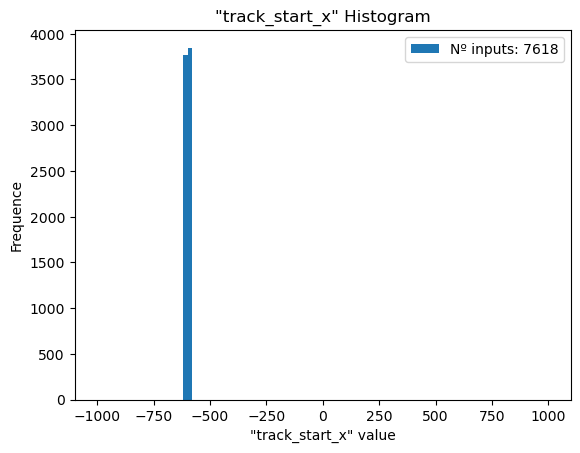

In [47]:
#"track_start values"
num_inputs= len(track_x)

#Histogram
plt.hist(track_x, bins=100, range=(-1000, 1000))

# Graph
plt.xlabel('"track_start_x" value')
plt.ylabel('Frequence')
plt.title('"track_start_x" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('track-x', dpi=200)

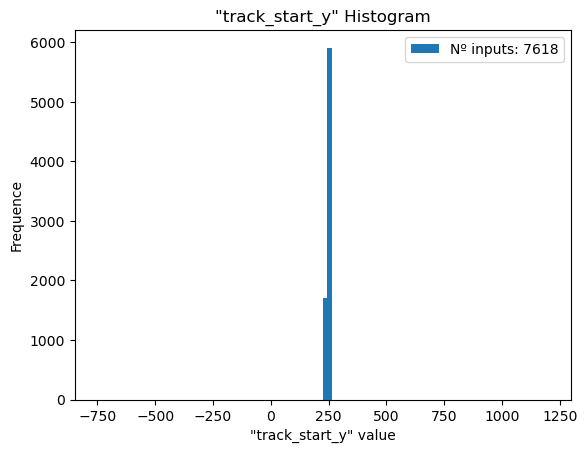

In [48]:
#"track_start values"
num_inputs= len(track_y)

#Histogram
plt.hist(track_y, bins=100, range=(-750,1200))

# Graph
plt.xlabel('"track_start_y" value')
plt.ylabel('Frequence')
plt.title('"track_start_y" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('track-y', dpi=200)

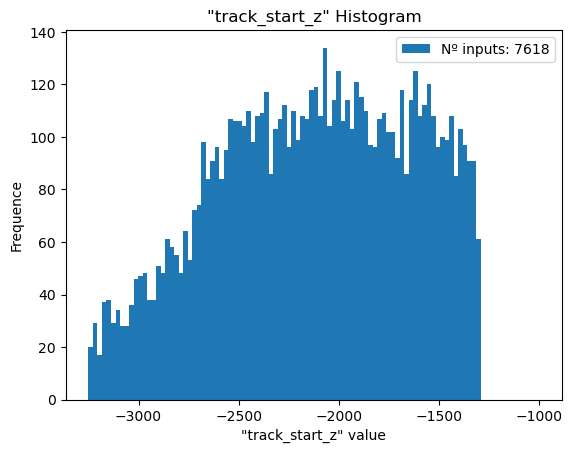

In [101]:
#"track_start values"
num_inputs= len(track_z)

#Histogram
plt.hist(track_z, bins=100, range=(-3250, -1000))

# Graph
plt.xlabel('"track_start_z" value')
plt.ylabel('Frequence')
plt.title('"track_start_z" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('track-z', dpi=200)

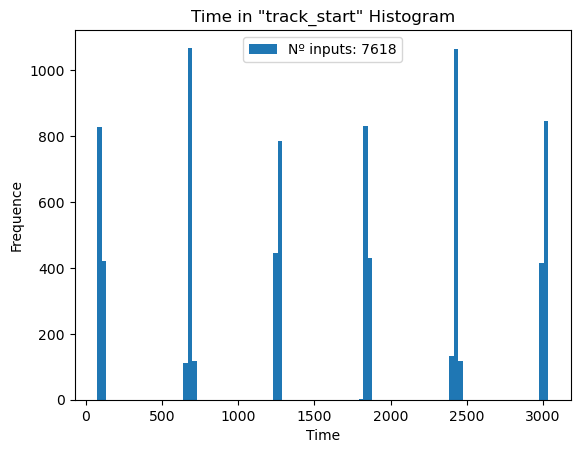

In [105]:
#"track_start values"
num_inputs= len(subentry3_track)

#Histogram
time_track=plt.hist(subentry3_track, bins=100)

# Graph
plt.xlabel('Time')
plt.ylabel('Frequence')
plt.title('Time in "track_start" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('time-track', dpi=200)

* Hat end pos Histogram:

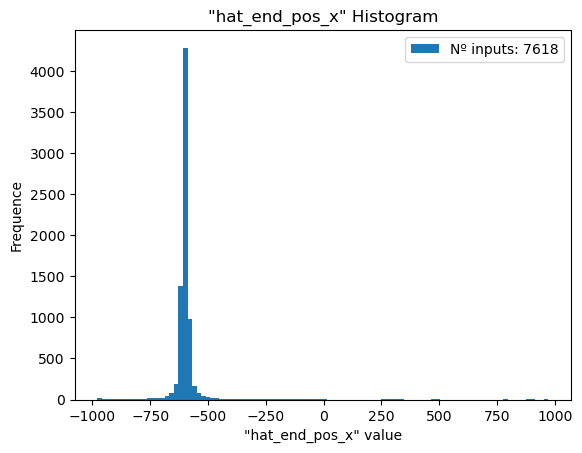

In [51]:
#"hat_end_pos values"
num_inputs= len(hat_end_x)

#Histogram
plt.hist(hat_end_x, bins=100)

# Graph
plt.xlabel('"hat_end_pos_x" value')
plt.ylabel('Frequence')
plt.title('"hat_end_pos_x" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-end-x', dpi=200)

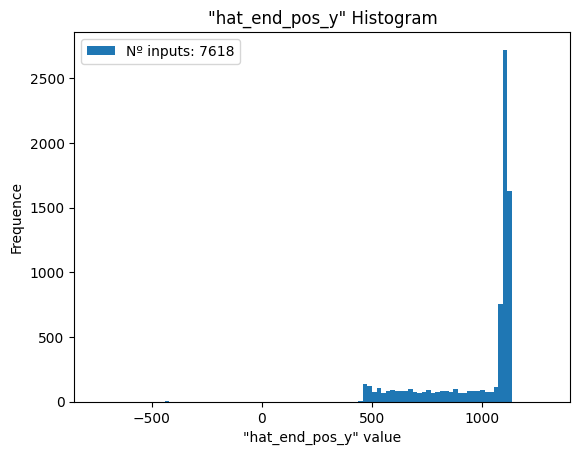

In [48]:
#"hat_end_pos values"
num_inputs= len(hat_end_y)

#Histogram
plt.hist(hat_end_y, bins=100, range=(-750,1300))

# Graph
plt.xlabel('"hat_end_pos_y" value')
plt.ylabel('Frequence')
plt.title('"hat_end_pos_y" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-end-y', dpi=200)

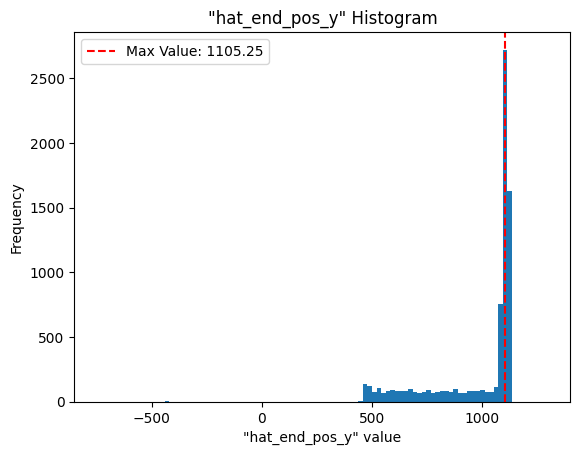

In [50]:
# Histogram
num_inputs= len(hat_end_y)

hist_values, bin_edges = np.histogram(hat_end_y, bins=100, range=(-750, 1300))

# Max
max_index = np.argmax(hist_values)

# Encontrar el valor correspondiente del punto donde está el máximo
max_value = (bin_edges[max_index] + bin_edges[max_index + 1]) / 2

# Graph
plt.hist(hat_end_y, bins=100, range=(-750, 1300))
plt.xlabel('"hat_end_pos_y" value')
plt.ylabel('Frequency')
plt.title('"hat_end_pos_y" Histogram')
legend_label = f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

# Max value representation
plt.axvline(x=max_value, color='red', linestyle='--', label=f'Max Value: {max_value:.2f}')
plt.legend()

plt.savefig('hat-end-y-max value', dpi=200)

plt.show()


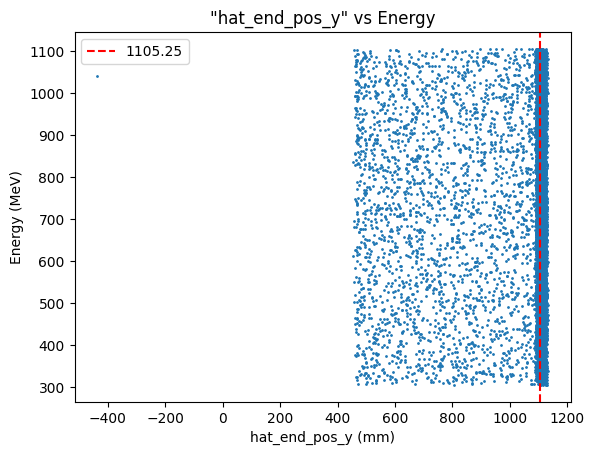

In [51]:
plt.scatter(hat_end_y, energy_values, s=1)
plt.axvline(x=1105.25, color='red', linestyle='--', label='1105.25')
plt.legend()
plt.xlabel('hat_end_pos_y (mm)')
plt.ylabel('Energy (MeV)')
plt.title('"hat_end_pos_y" vs Energy')

plt.savefig('hat-end-y-energy', dpi=200)

In [106]:
phi=np.arccos(p_z/p_values)
phi

array([2.1756477 , 2.4572651 , 1.754976  , ..., 1.2993813 , 1.7175149 ,
       0.74193585], dtype=float32)

In [107]:
theta=np.arccos(p_x/(p_values*np.sin(phi)))
theta

array([1.5708001, 1.5708001, 1.5708001, ..., 1.5708001, 1.5708001,
       1.5708001], dtype=float32)

In [108]:
theta2=np.arcsin((p_y/(p_values*np.sin(phi))))
theta2

/tmp/ipykernel_109/3207554669.py:1: RuntimeWarning: invalid value encountered in arcsin
  theta2=np.arcsin((p_y/(p_values*np.sin(phi))))


array([1.5707964,       nan, 1.5707964, ..., 1.5707964, 1.5707964,
       1.5703081], dtype=float32)

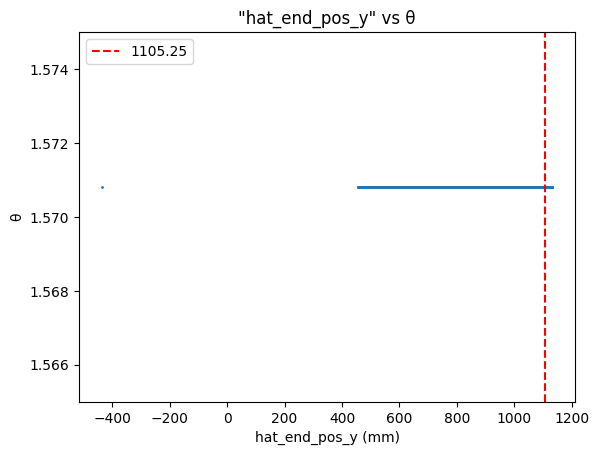

In [111]:
plt.scatter(hat_end_y, theta, s=1)
plt.axvline(x=1105.25, color='red', linestyle='--', label='1105.25')
plt.legend()
plt.xlabel('hat_end_pos_y (mm)')
plt.ylabel('\u03b8')
plt.ylim(1.565,1.575)
plt.title('"hat_end_pos_y" vs \u03b8')
plt.savefig('hat-end-y-theta', dpi=200)

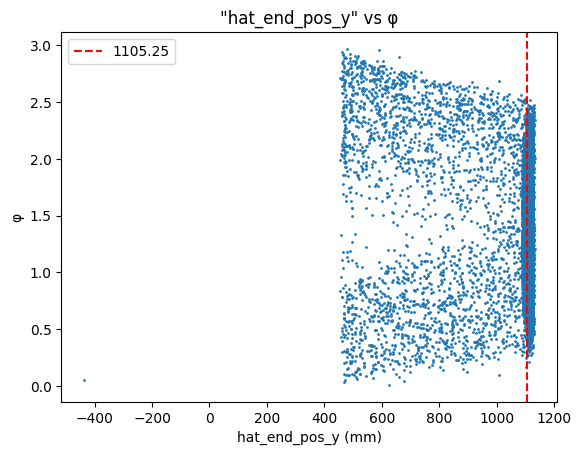

In [73]:
plt.scatter(hat_end_y, phi, s=1)
plt.axvline(x=1105.25, color='red', linestyle='--', label='1105.25')
plt.legend()
plt.xlabel('hat_end_pos_y (mm)')
plt.ylabel('φ')
plt.title('"hat_end_pos_y" vs φ')
plt.savefig('hat-end-y-phi', dpi=200)

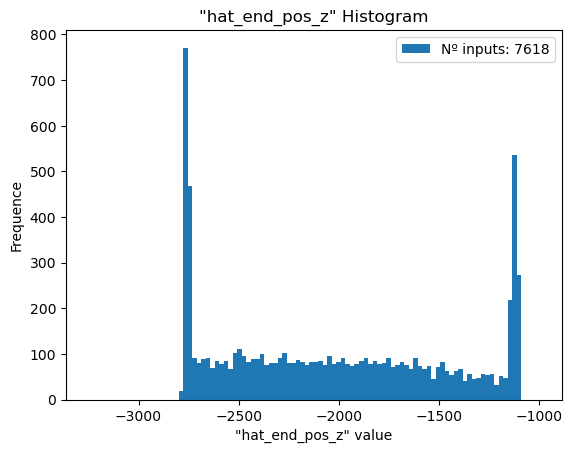

In [100]:
#"hat_end_pos values"
num_inputs= len(hat_end_z)

#Histogram
plt.hist(hat_end_z, bins=100, range=(-3250, -1000))

# Graph
plt.xlabel('"hat_end_pos_z" value')
plt.ylabel('Frequence')
plt.title('"hat_end_pos_z" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-end-z', dpi=200)

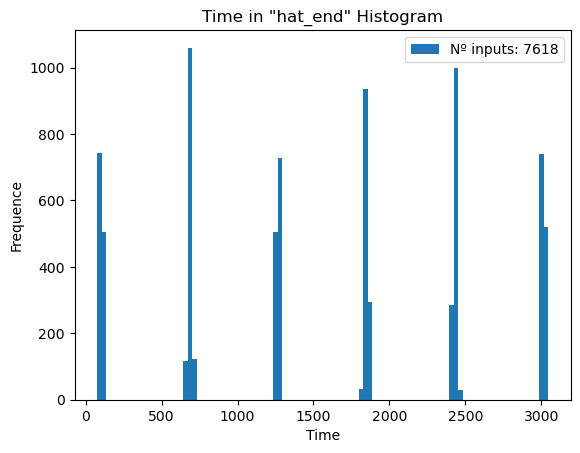

In [104]:
#"hat_end_pos values"
num_inputs= len(subentry3_hat_end)

#Histogram
time_end=plt.hist(subentry3_hat_end, bins=100)

# Graph
plt.xlabel('Time')
plt.ylabel('Frequence')
plt.title('Time in "hat_end" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('time-hat_end', dpi=200)

* Hat start pos Histogram:

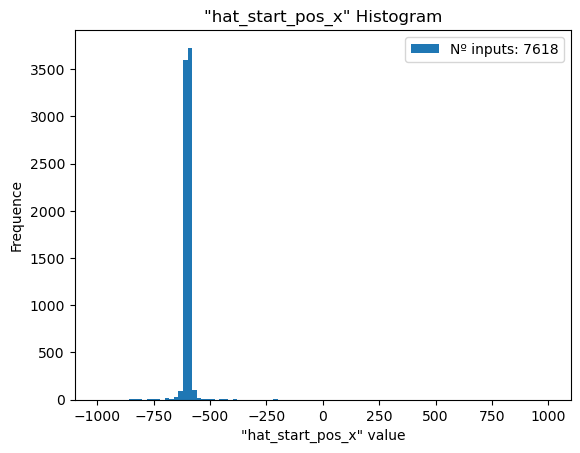

In [55]:
#"hat_start_pos values"
num_inputs= len(hat_start_x)

#Histogram
plt.hist(hat_start_x, bins=100, range=(-1000, 1000))

# Graph
plt.xlabel('"hat_start_pos_x" value')
plt.ylabel('Frequence')
plt.title('"hat_start_pos_x" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-start-x', dpi=200)

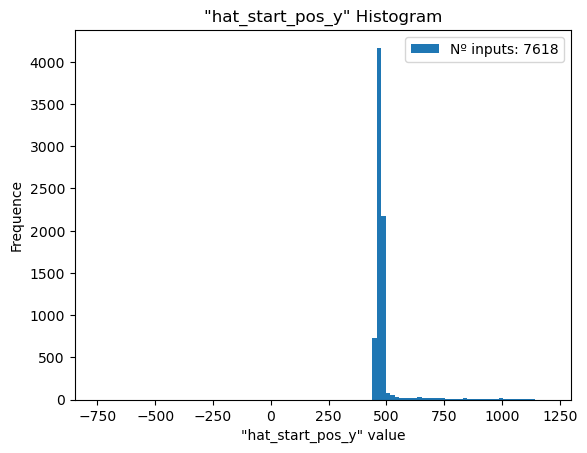

In [56]:
#"hat_start_pos values"
num_inputs= len(hat_start_y)

#Histogram
plt.hist(hat_start_y, bins=100, range=(-750,1200))

# Graph
plt.xlabel('"hat_start_pos_y" value')
plt.ylabel('Frequence')
plt.title('"hat_start_pos_y" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-start-y', dpi=200)

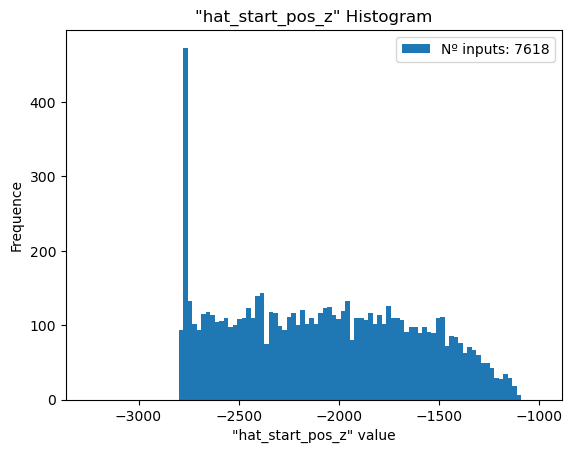

In [103]:
#"hat_start_pos values"
num_inputs= len(hat_start_z)

#Histogram
plt.hist(hat_start_z, bins=100, range=(-3250, -1000))

# Graph
plt.xlabel('"hat_start_pos_z" value')
plt.ylabel('Frequence')
plt.title('"hat_start_pos_z" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('hat-start-z', dpi=200)

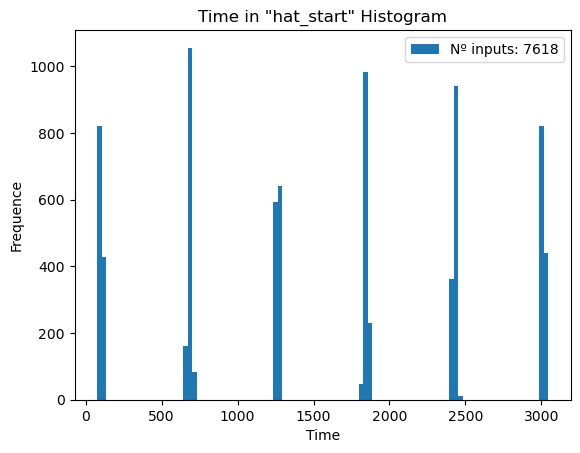

In [106]:
#"hat_start_pos values"
num_inputs= len(subentry3_hat_start)

#Histogram
time_start=plt.hist(subentry3_hat_start, bins=100)

# Graph
plt.xlabel('Time')
plt.ylabel('Frequence')
plt.title('Time in "hat_start" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('time-hat-start', dpi=200)

* track_start - hat_end_pos difference Histogram:

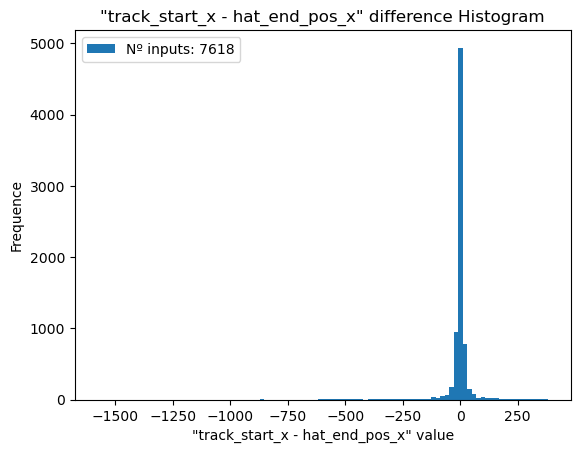

In [59]:
#difference values
dif_end_x= track_x-hat_end_x
num_inputs= len(dif_end_x)

#Histogram
plt.hist(dif_end_x, bins=100)

# Graph
plt.xlabel('"track_start_x - hat_end_pos_x" value')
plt.ylabel('Frequence')
plt.title('"track_start_x - hat_end_pos_x" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('x-track-hat-end', dpi=200)

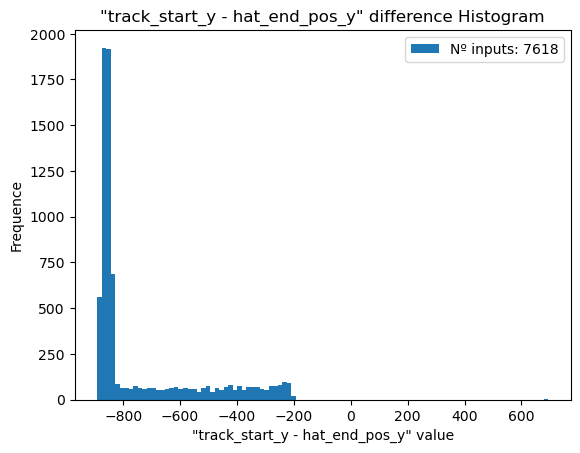

In [60]:
#difference values
dif_end_y= track_y-hat_end_y
num_inputs= len(dif_end_y)

#Histogram
plt.hist(dif_end_y, bins=100)

# Graph
plt.xlabel('"track_start_y - hat_end_pos_y" value')
plt.ylabel('Frequence')
plt.title('"track_start_y - hat_end_pos_y" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('y-track-hat-end', dpi=200)

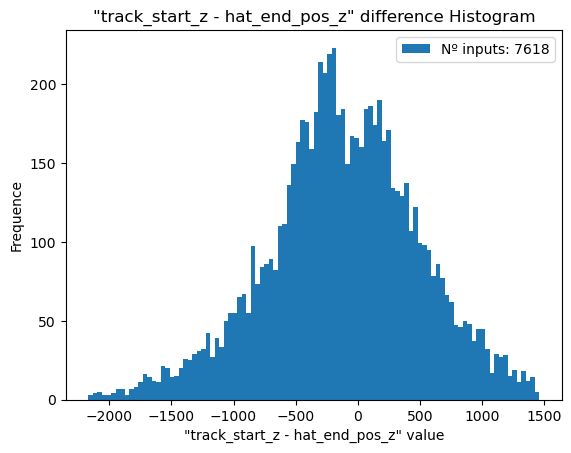

In [61]:
#difference values
dif_end_z= track_z-hat_end_z
num_inputs= len(dif_end_z)

#Histogram
plt.hist(dif_end_z, bins=100)

# Graph
plt.xlabel('"track_start_z - hat_end_pos_z" value')
plt.ylabel('Frequence')
plt.title('"track_start_z - hat_end_pos_z" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('z-track-hat-end', dpi=200)

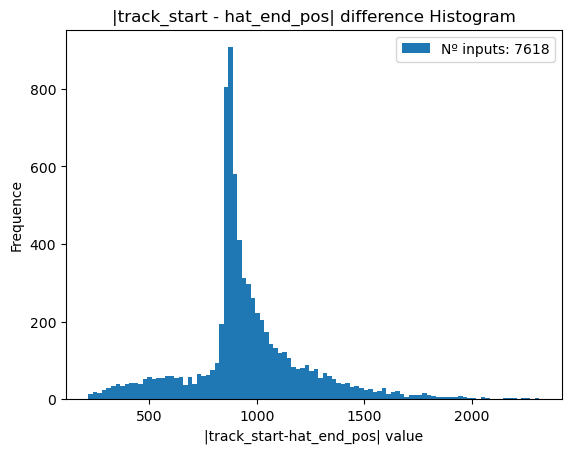

In [62]:
dif_module_1=np.sqrt(dif_end_x**2+dif_end_y**2+dif_end_z**2)
num_inputs= len(dif_module_1)

plt.hist(dif_module_1, bins=100)
plt.xlabel('|track_start-hat_end_pos| value')
plt.ylabel('Frequence')
plt.title('|track_start - hat_end_pos| difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('module-track-hat-end', dpi=200)

* track_start -hat_start_pos difference Histogram:

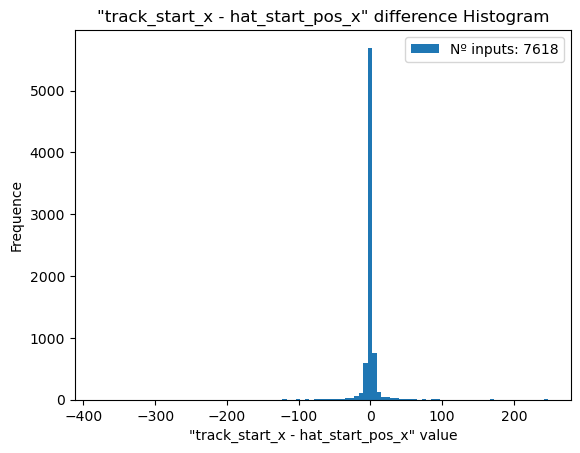

In [63]:
#difference values
dif_start_x= track_x-hat_start_x
num_inputs= len(dif_start_x)

#Histogram
plt.hist(dif_start_x, bins=100)

# Graph
plt.xlabel('"track_start_x - hat_start_pos_x" value')
plt.ylabel('Frequence')
plt.title('"track_start_x - hat_start_pos_x" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('x-track-hat-start', dpi=200)

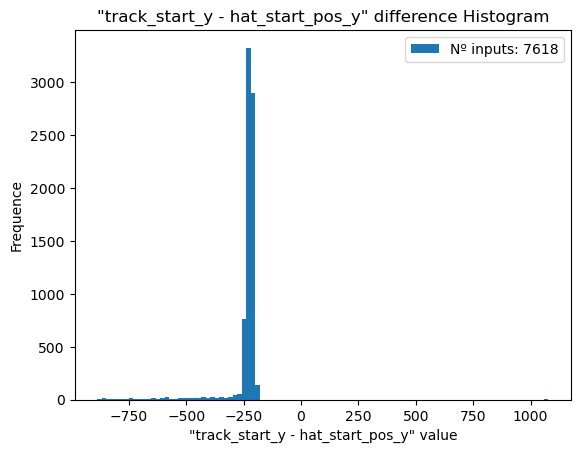

In [64]:
#difference values
dif_start_y= track_y-hat_start_y
num_inputs= len(dif_start_y)

#Histogram
plt.hist(dif_start_y, bins=100)

# Graph
plt.xlabel('"track_start_y - hat_start_pos_y" value')
plt.ylabel('Frequence')
plt.title('"track_start_y - hat_start_pos_y" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('y-track-hat-start', dpi=200)

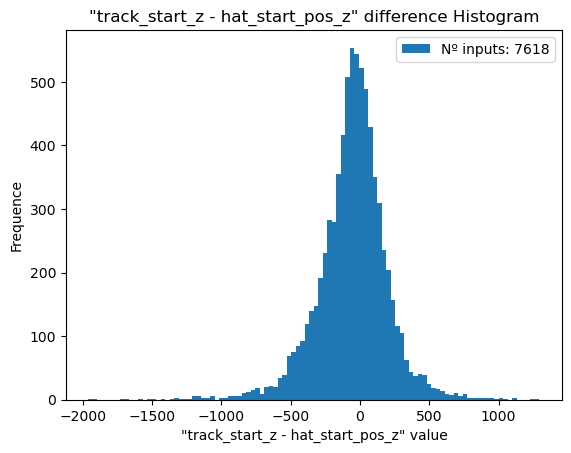

In [65]:
#difference values
dif_start_z= track_z-hat_start_z
num_inputs= len(dif_start_z)

#Histogram
plt.hist(dif_start_z, bins=100)

# Graph
plt.xlabel('"track_start_z - hat_start_pos_z" value')
plt.ylabel('Frequence')
plt.title('"track_start_z - hat_start_pos_z" difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('z-track-hat-start', dpi=200)

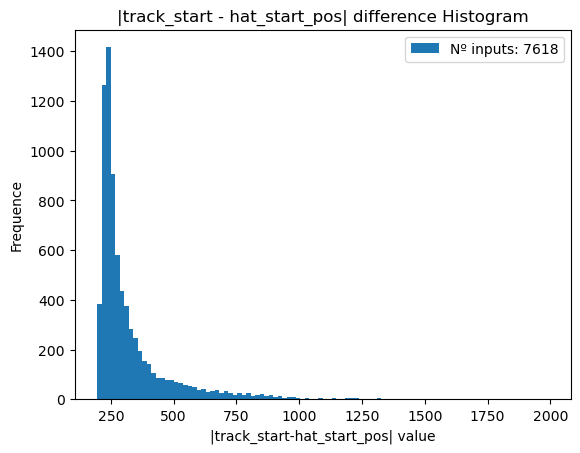

In [66]:
dif_module_2=np.sqrt(dif_start_x**2+dif_start_y**2+dif_start_z**2)
num_inputs= len(dif_module_2)

plt.hist(dif_module_2, bins=100)
plt.xlabel('|track_start-hat_start_pos| value')
plt.ylabel('Frequence')
plt.title('|track_start - hat_start_pos| difference Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('module-track-hat-start', dpi=200)

* Δ hat Histogram:

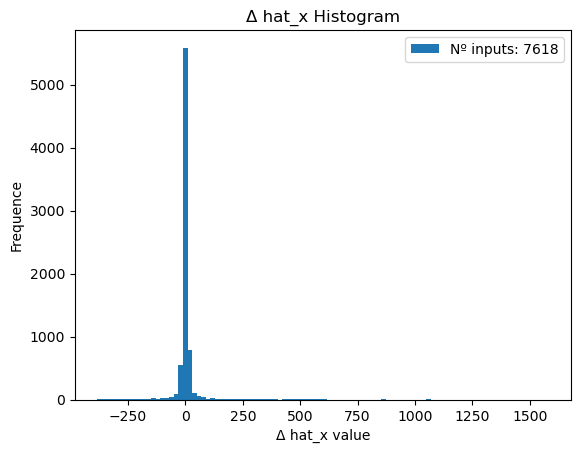

In [67]:
#difference values
difference_hats_values_x= hat_end_x - hat_start_x
num_inputs= len(difference_hats_values_x)

#Histogram
plt.hist(difference_hats_values_x, bins=100)

# Graph
plt.xlabel('\u0394 hat_x value')
plt.ylabel('Frequence')
plt.title('\u0394 hat_x Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('x-hat-dif', dpi=200)

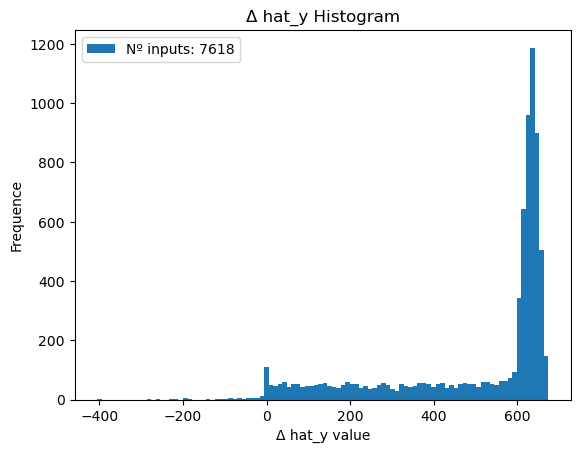

In [68]:
#difference values
difference_hats_values_y= hat_end_y - hat_start_y
num_inputs= len(difference_hats_values_x)

#Histogram
plt.hist(difference_hats_values_y, bins=100)

# Graph
plt.xlabel('\u0394 hat_y value')
plt.ylabel('Frequence')
plt.title('\u0394 hat_y Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('y-hat-dif', dpi=200)

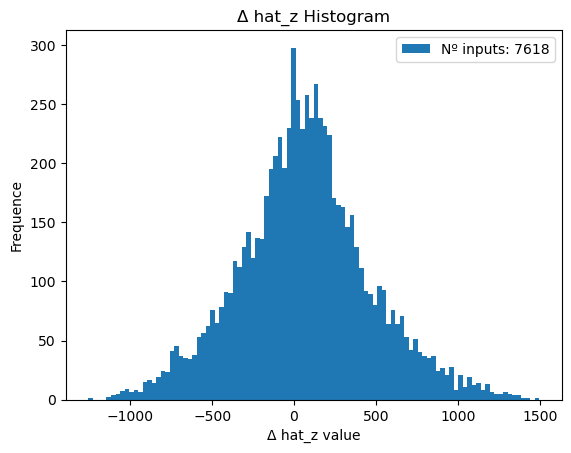

In [69]:
#difference values
difference_hats_values_z= hat_end_z - hat_start_z
num_inputs= len(difference_hats_values_z)

#Histogram
plt.hist(difference_hats_values_z, bins=100)

# Graph
plt.xlabel('\u0394 hat_z value')
plt.ylabel('Frequence')
plt.title('\u0394 hat_z Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('z-hat-dif', dpi=200)

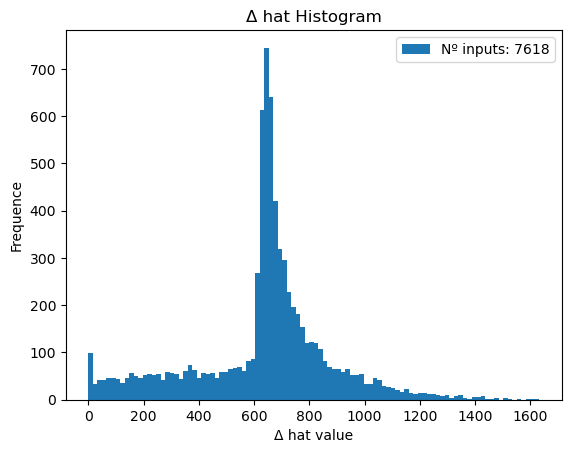

In [70]:
#difference values
difference_hats_values_module2=np.sqrt(difference_hats_values_x**2+difference_hats_values_y**2+difference_hats_values_z**2)
num_inputs= len(difference_hats_values_module2)

#Histogram
plt.hist(difference_hats_values_module2, bins=100)

# Graph
plt.xlabel('\u0394 hat value')
plt.ylabel('Frequence')
plt.title('\u0394 hat Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('module-hat-dif', dpi=200)

* Time dif graphs:

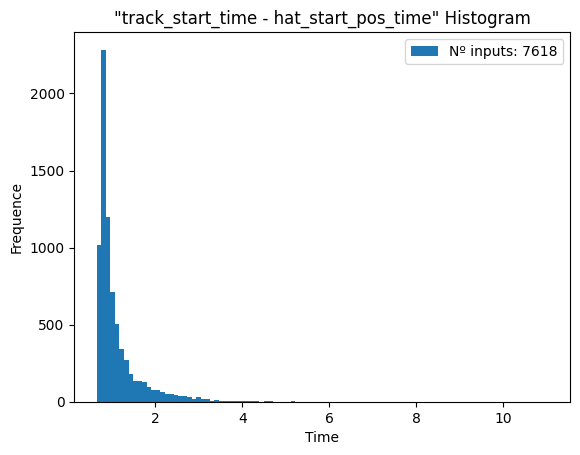

In [94]:
time_track_start= subentry3_track-subentry3_hat_start
time_track_start_abs= abs(time_track_start)

num_inputs= len(time_track_start_abs)

#Histogram
time_start=plt.hist(time_track_start_abs, bins=100)

# Graph
plt.xlabel('Time')
plt.ylabel('Frequence')
plt.title('"track_start_time - hat_start_pos_time" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.savefig('time-track-hat-start', dpi=200)

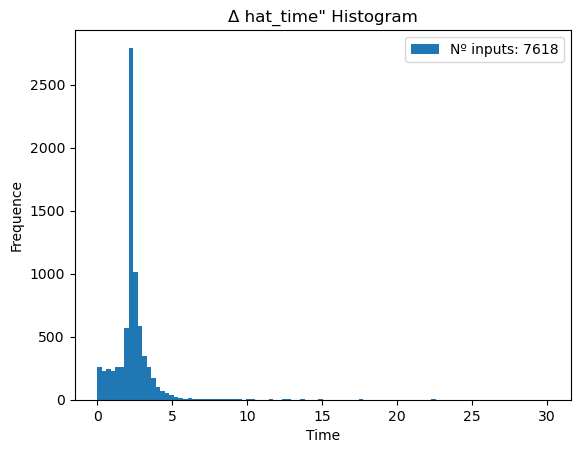

In [110]:
delta_time= subentry3_hat_end-subentry3_hat_start

num_inputs= len(delta_time)

#Histogram
time_start=plt.hist(delta_time, bins=100)

# Graph
plt.xlabel('Time')
plt.ylabel('Frequence')
plt.title('\u0394 hat_time" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.savefig('delta-time-hat', dpi=200)

* nhits Histogram:

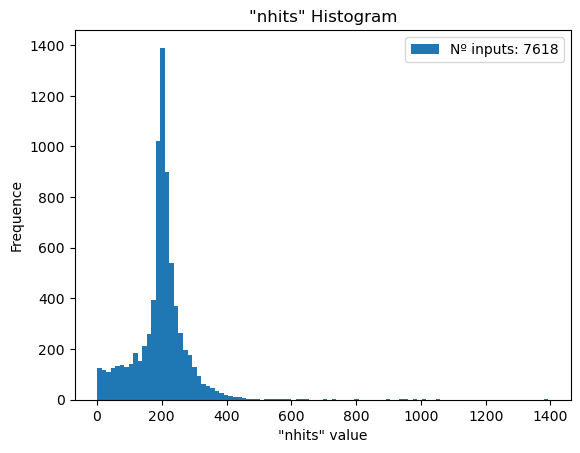

In [71]:
#nhits values
num_inputs= len(nhits_values)

#Histogram
plt.hist(nhits_values, bins=100)

# Graph
plt.xlabel('"nhits" value')
plt.ylabel('Frequence')
plt.title('"nhits" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('nhits2', dpi=200)

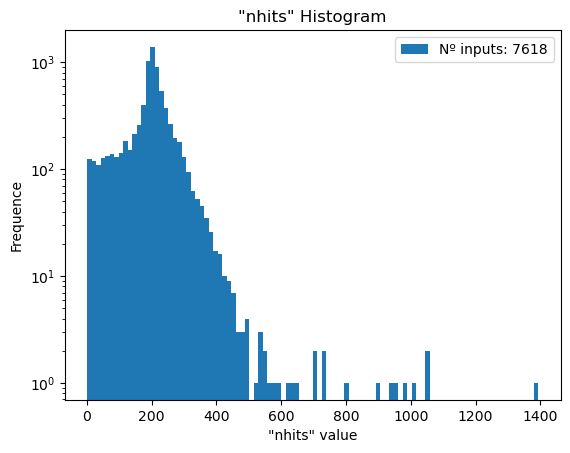

In [72]:
#nhits values
num_inputs= len(nhits_values)

#Histogram
plt.hist(nhits_values, bins=100, log=True)

# Graph
plt.xlabel('"nhits" value')
plt.ylabel('Frequence')
plt.title('"nhits" Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('nhits', dpi=200)

* Energy Histogram:

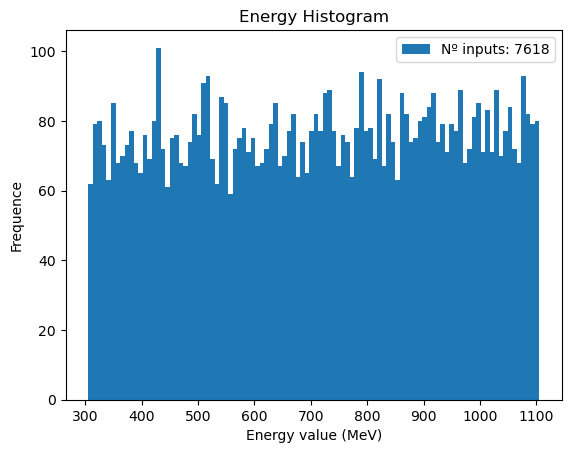

In [73]:
#Histogram
plt.hist(energy_values, bins=100)
num_inputs= len(energy_values)

# Graph
plt.xlabel('Energy value (MeV)')
plt.ylabel('Frequence')
plt.title('Energy Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('energy', dpi=200)

* Momentum Histograms:

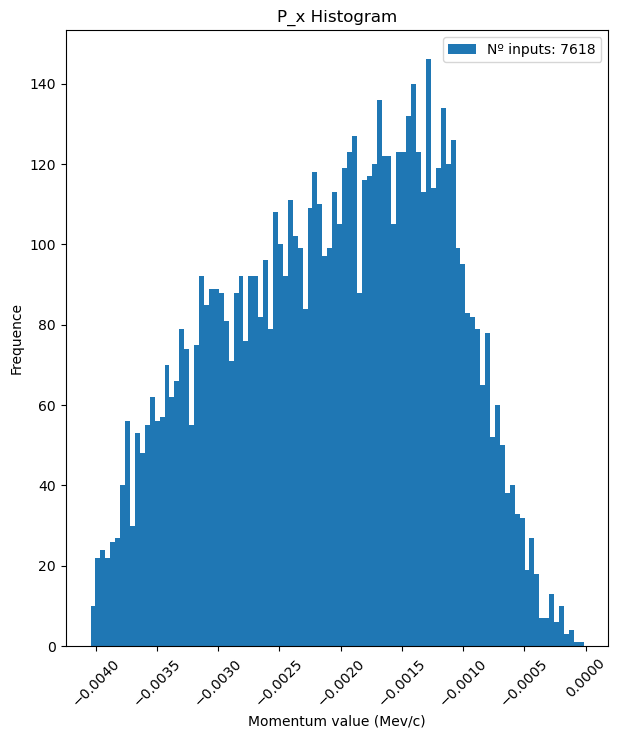

In [74]:
#Histogram
plt.figure(figsize=(7,8))
plt.hist(p_x, bins=100)
num_inputs= len(p_x)

# Graph
plt.xlabel('Momentum value (Mev/c)')
plt.xticks(rotation=45)
plt.ylabel('Frequence')
plt.title('P_x Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.savefig('p_x', dpi=200)

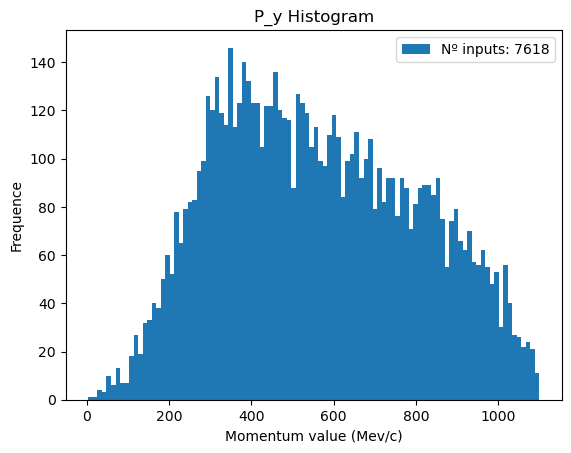

In [75]:
#Histogram
plt.hist(p_y, bins=100)
num_inputs= len(p_y)

# Graph
plt.xlabel('Momentum value (Mev/c)')
plt.ylabel('Frequence')
plt.title('P_y Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('p_y', dpi=200)

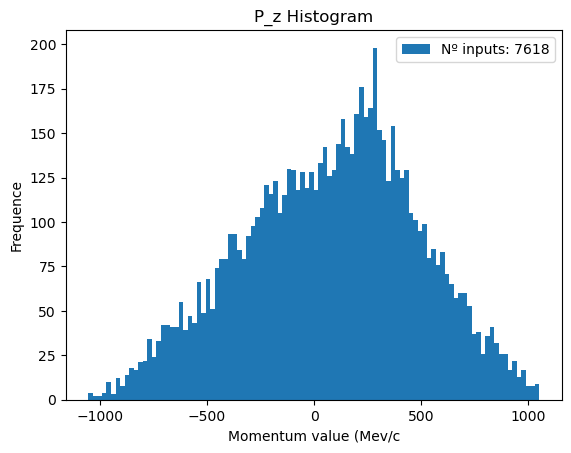

In [76]:
#Histogram
plt.hist(p_z, bins=100)
num_inputs= len(p_z)

# Graph
plt.xlabel('Momentum value (Mev/c')
plt.ylabel('Frequence')
plt.title('P_z Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('p_z', dpi=200)

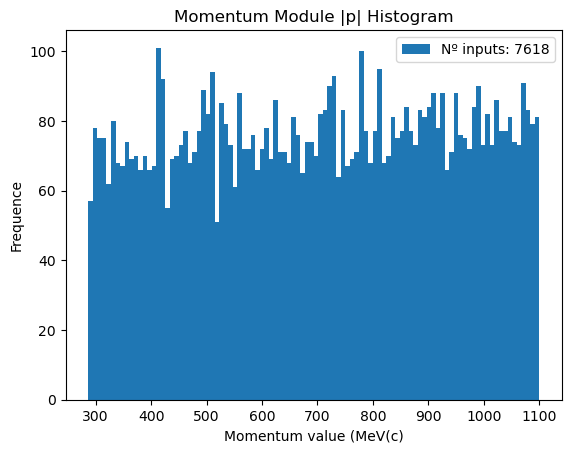

In [77]:
#Histogram
plt.hist(p_values, bins=100)
num_inputs= len(p_values)

# Graph
plt.xlabel('Momentum value (MeV(c)')
plt.ylabel('Frequence')
plt.title('Momentum Module |p| Histogram')
legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])
plt.savefig('p_module', dpi=200)

* Comparison between energy and momentum

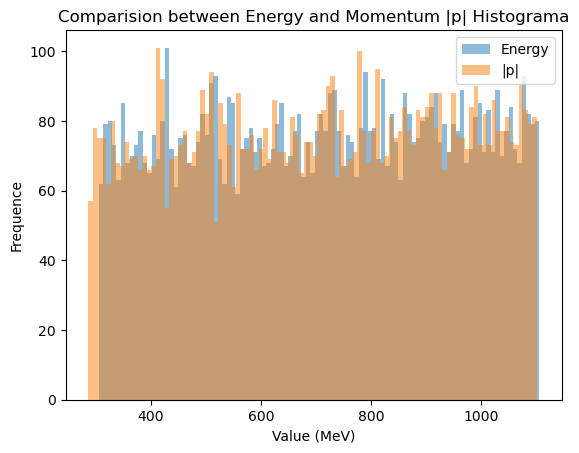

In [78]:
fig, ax = plt.subplots()

bins = 100  


ax.hist(energy_values, bins=bins, alpha=0.5, label='Energy')

ax.hist(p_values, bins=bins, alpha=0.5, label='|p|')

ax.set_xlabel('Value (MeV)')
ax.set_ylabel('Frequence')
ax.set_title('Comparision between Energy and Momentum |p| Histograma')
ax.legend()


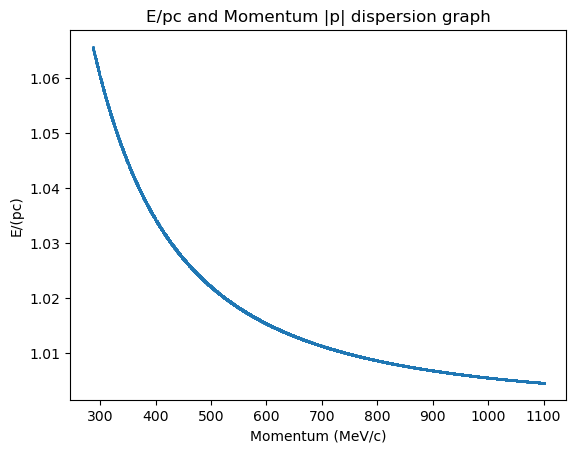

In [79]:
c=1
energy_values_normalized=energy_values/(p_values*c)
graph1=plt.scatter( p_values,energy_values_normalized, s=1)
plt.title('E/pc and Momentum |p| dispersion graph')
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('E/(pc)')
plt.savefig('1', dpi=200)

[888.40106 686.0465  663.65076 ... 957.88965 384.04028 966.53436]
[0.99999446 0.9999906  0.99999    ... 0.99999523 0.9999702  0.99999535]


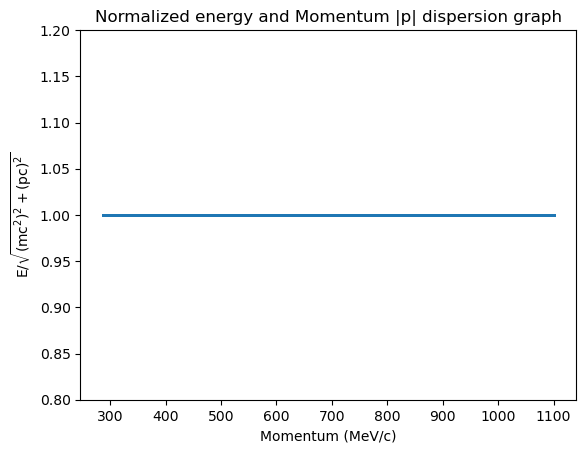

In [80]:
m=105.7
c=1
energy_values_withsqrt=(energy_values)/(np.sqrt((m * (c**2))**2 + ((p_values * c)**2)))
print(energy_values)
print(energy_values_withsqrt)
graph2=plt.scatter(p_values, energy_values_withsqrt, s=1)
plt.title('Normalized energy and Momentum |p| dispersion graph')
plt.xlabel('Momentum (MeV/c)')
plt.ylabel('E/$\sqrt{\mathrm{(mc^2)^2+(pc)^2}}$')

plt.ylim(0.8,1.2 )

plt.ticklabel_format(useOffset=False, style='plain')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.savefig('2', dpi=200)

NameError: name 'energy_values_normalized' is not defined

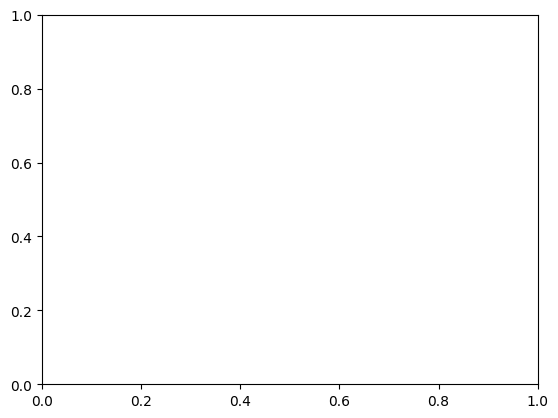

In [64]:
fig, ax = plt.subplots()

graph1 = ax.scatter(p_values, energy_values_normalized, s=1, label=r'E/(pc)')

graph2 = ax.scatter(p_values, energy_values_withsqrt, s=1, label='E/$\sqrt{\mathrm{(mc^2)^2+(pc)^2}}$')

ax.set_xlabel('Momentum (MeV/c)')
ax.set_ylabel('Normalized Energy')

legend = ax.legend(handles=[graph1, graph2], labels=[r'E/(pc)', r'E/$\sqrt{\mathrm{(mc^2)^2+(pc)^2}}$'], loc='best', scatterpoints=1, markerscale=5)

ax.add_artist(legend)
plt.savefig('comparision', dpi=200)

* Coordinates 3D plots:

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [32]:
track_x

array([-600.2058 , -602.7949 , -598.22   , ..., -598.1442 , -591.53186,
       -606.54193], dtype=float32)

In [33]:
track_y

array([254.44969, 254.82008, 253.69856, ..., 251.46562, 254.45602,
       241.91212], dtype=float32)

In [34]:
track_z

array([-2123.9536, -1453.3429, -2652.0208, ..., -2131.4885, -1460.4421,
       -1959.2295], dtype=float32)

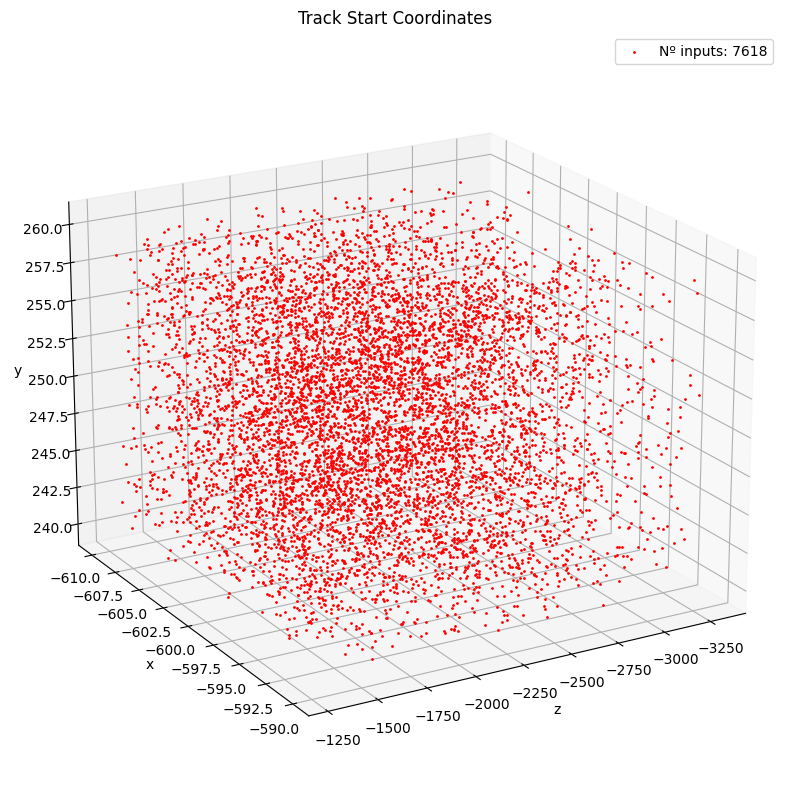

In [66]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

num_inputs=len(track_z)

n = 0
for x, y, z in zip(track_z, track_x, track_y):
    ax.scatter(x, y, z, c='r', marker='o',s=1)
    n += 1

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.view_init(elev=20, azim=60)

legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.tight_layout()

plt.title('Track Start Coordinates')

plt.savefig('cord_tracks', dpi=100)

In [41]:
hat_start_x

array([-599.35297, -602.04535, -598.89087, ..., -597.3421 , -590.13165,
       -607.1974 ], dtype=float32)

In [42]:
hat_start_y

array([455.5    , 470.56927, 489.87308, ..., 455.5    , 475.081  ,
       455.5    ], dtype=float32)

In [43]:
hat_start_z

array([-2266.165 , -1725.385 , -2695.741 , ..., -2074.8542, -1500.2421,
       -1733.6058], dtype=float32)

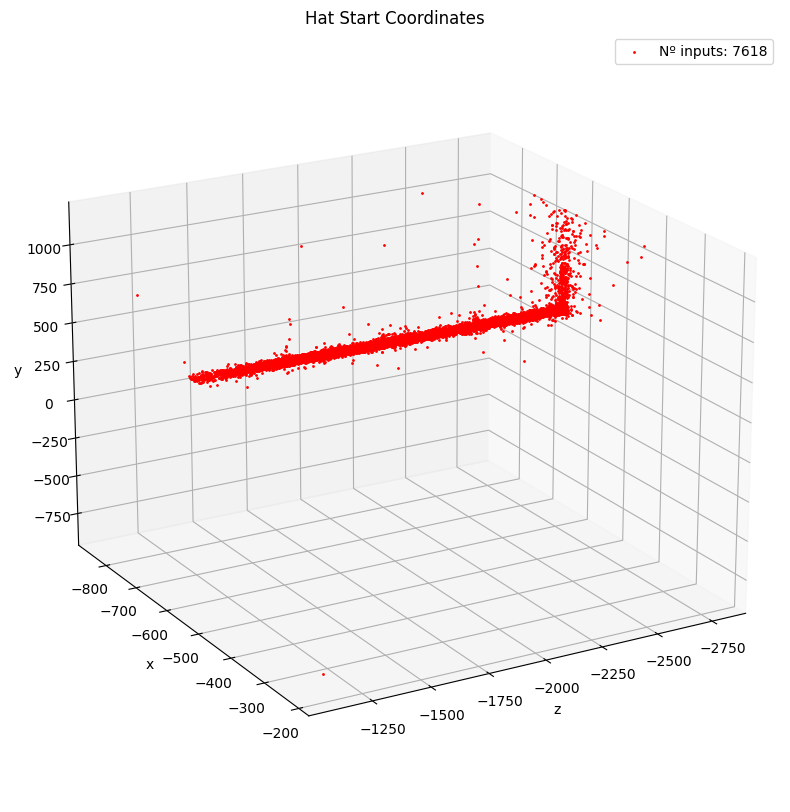

In [67]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

num_inputs=len(hat_start_x)

n = 0
for x, y, z in zip(hat_start_z, hat_start_x, hat_start_y):
    ax.scatter(x, y, z, c='r', marker='o',s=1)
    n += 1

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.view_init(elev=20, azim=60)

legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.tight_layout()

plt.title('Hat Start Coordinates')

plt.savefig('cord_hat_start', dpi=100)

In [45]:
hat_end_x

array([-595.5952 , -594.8971 , -599.72156, ..., -596.0165 , -582.0097 ,
       -611.23914], dtype=float32)

In [46]:
hat_end_y

array([1095.478 , 1124.0364,  846.9733, ..., 1111.6575, 1119.5431,
       1092.5408], dtype=float32)

In [47]:
hat_end_z

array([-2756.6863, -2674.9087, -2771.3843, ..., -1909.0309, -1673.0763,
       -1112.2549], dtype=float32)

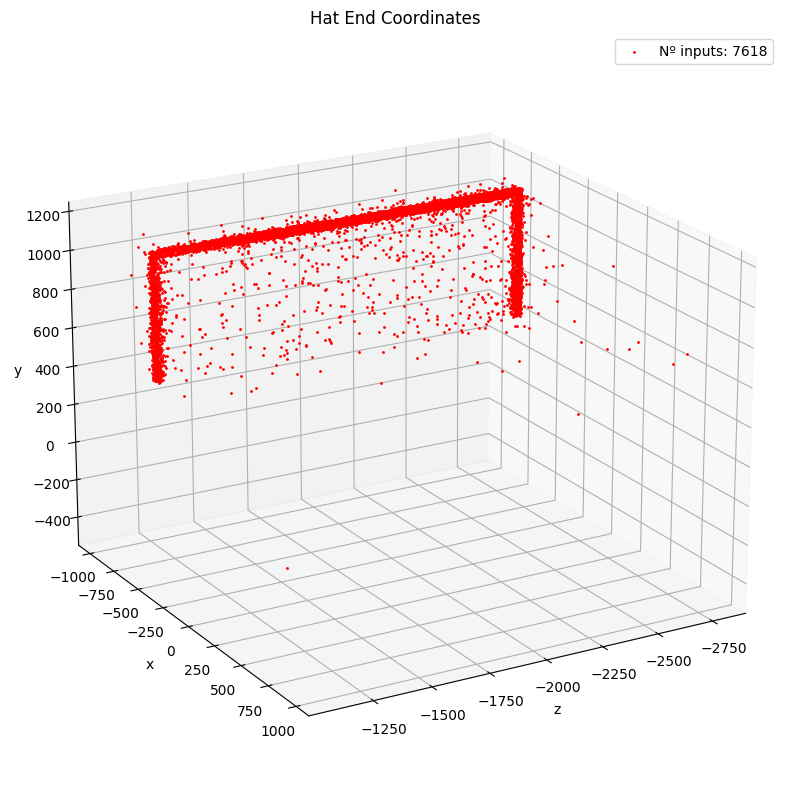

In [68]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

num_inputs=len(hat_end_y)

n = 0
for x, y, z in zip(hat_end_z, hat_end_x, hat_end_y):
    ax.scatter(x, y, z, c='r', marker='o',s=1)
    n += 1

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.view_init(elev=20, azim=60)

legend_label= f'Nº inputs: {num_inputs}'
plt.legend([legend_label])

plt.tight_layout()

plt.title('Hat End Coordinates')

plt.savefig('cord_hat_end', dpi=100)

In [109]:
track_list_x=track_x[15:20]
track_list_y=track_y[15:20]
track_list_z=track_z[15:20]

In [110]:
hat_end_list_x=hat_end_x[15:20]
hat_end_list_y=hat_end_y[15:20]
hat_end_list_z=hat_end_z[15:20]

In [111]:
hat_start_list_x=hat_start_x[15:20]
hat_start_list_y=hat_start_y[15:20]
hat_start_list_z=hat_start_z[15:20]

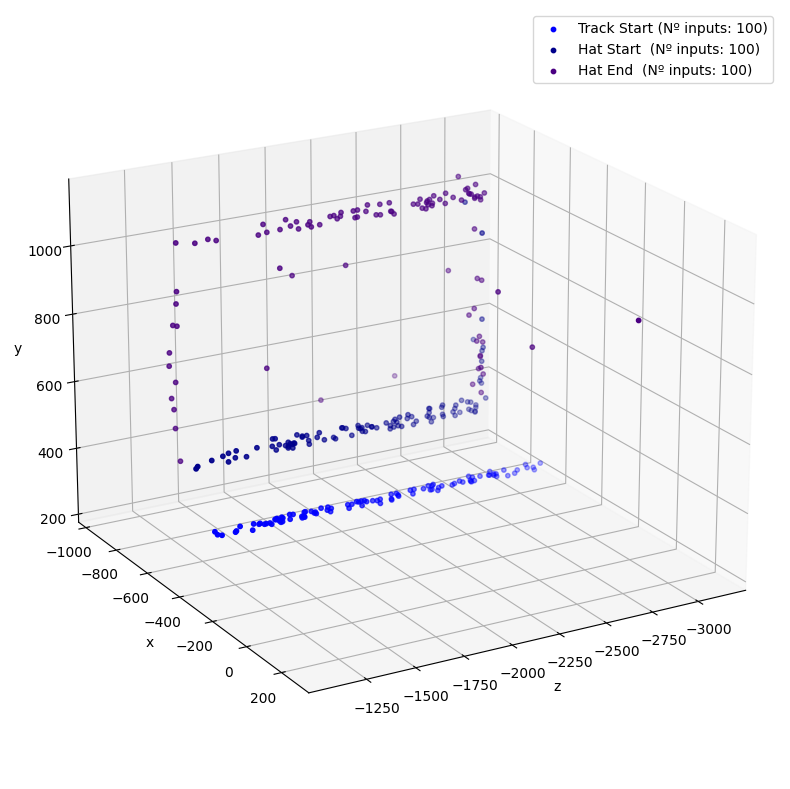

In [74]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)

# Scatter plot for track_list points with label 'Track'
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})' )

# Scatter plot for hat_start_list points with label 'Hat Start'
hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

# Scatter plot for hat_end_list points with label 'Hat End'
hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End  (Nº inputs: {num_inputs3})')
    
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

# Create a legend based on the labels specified in the scatter plots
ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.savefig('distrib', dpi=200)

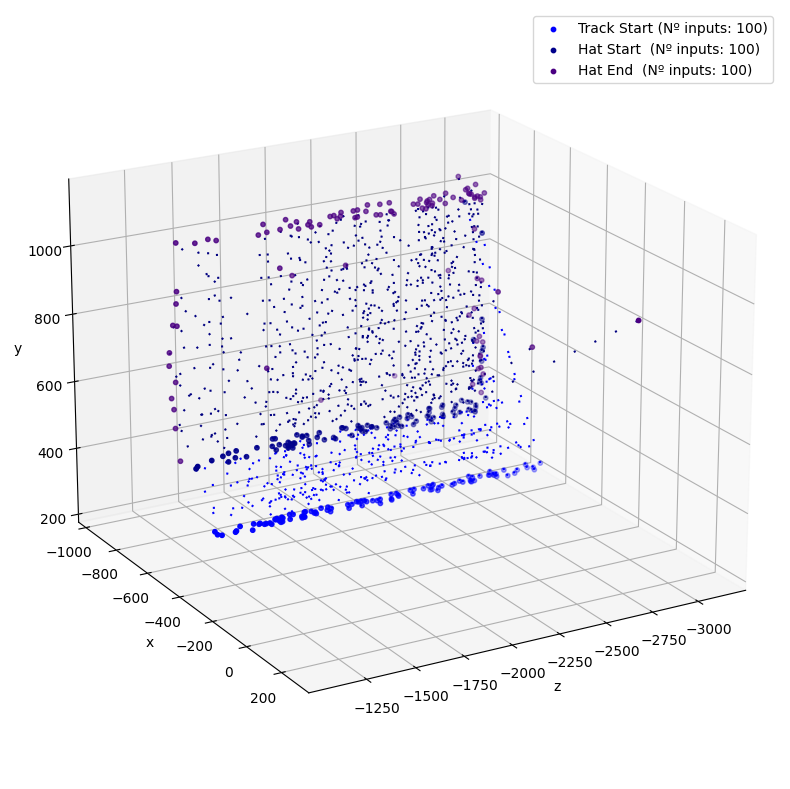

In [77]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D, art3d

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)

#Scatter 
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})')

hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End  (Nº inputs: {num_inputs3})')

# Lines between 'Track' and 'Hat Start' points
for x1, y1, z1, x2, y2, z2 in zip(track_list_z, track_list_x, track_list_y, hat_start_list_z, hat_start_list_x, hat_start_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='blue', linestyle=(0, (1, 10)),  alpha=1)

# Lines between'Hat Start' and 'Hat End' points
for x1, y1, z1, x2, y2, z2 in zip(hat_start_list_z, hat_start_list_x, hat_start_list_y, hat_end_list_z, hat_end_list_x, hat_end_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='navy', linestyle=(0, (1, 10)),  alpha=1)


ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.savefig('distrib-inter', dpi=200)

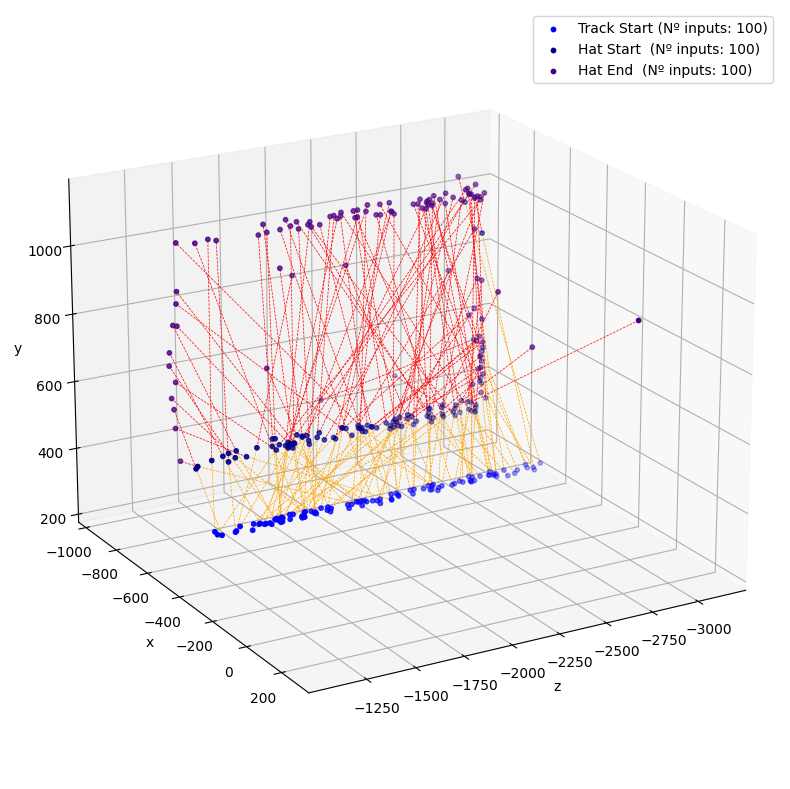

In [78]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D, art3d

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)

#Scatter 
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})')

hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End  (Nº inputs: {num_inputs3})')

# Lines between 'Track' and 'Hat Start' points
for x1, y1, z1, x2, y2, z2 in zip(track_list_z, track_list_x, track_list_y, hat_start_list_z, hat_start_list_x, hat_start_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='orange', linestyle='dashed',  alpha=1, linewidth=0.5)

# Lines between'Hat Start' and 'Hat End' points
for x1, y1, z1, x2, y2, z2 in zip(hat_start_list_z, hat_start_list_x, hat_start_list_y, hat_end_list_z, hat_end_list_x, hat_end_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='red', linestyle='dashed',  alpha=1,  linewidth=0.5)


ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.savefig('distrib-lines', dpi=200)

In [108]:
p_x_list=p_x[15:20]
p_y_list=p_y[15:20]
p_z_list=p_z[15:20]

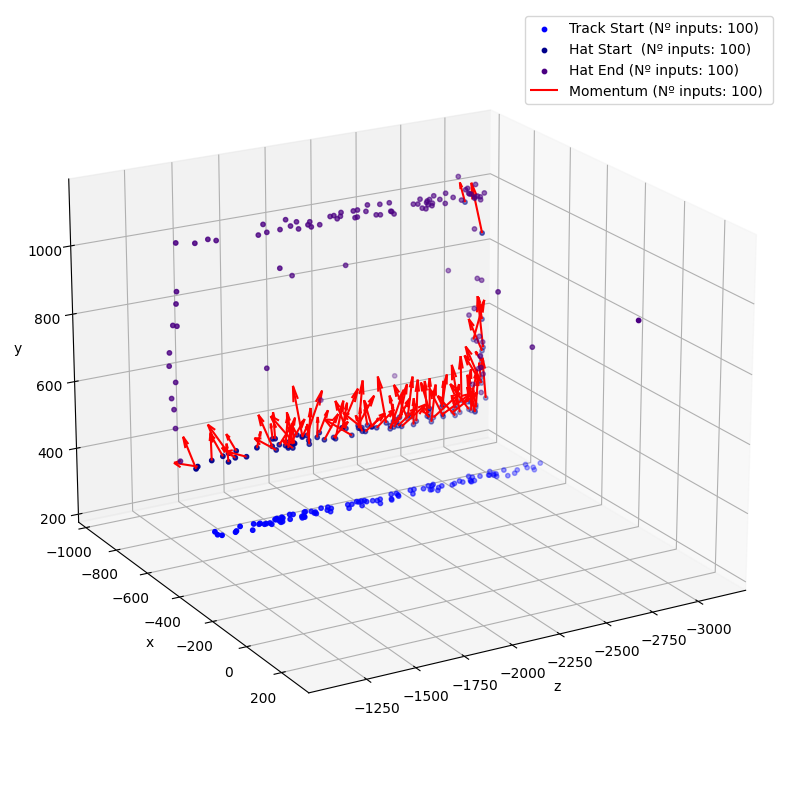

In [82]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)
num_inputs4= len(p_x_list)

# Scatter plot for track_list points with label 'Track'
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})')

# Scatter plot for hat_start_list points with label 'Hat Start'
hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

# Scatter plot for hat_end_list points with label 'Hat End'
hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End (Nº inputs: {num_inputs3})')

# Momentum vectors
arrows=ax.quiver(hat_start_list_z, hat_start_list_x, hat_start_list_y, p_z_list, p_x_list, p_y_list, color='red', length=0.15, label=f'Momentum (Nº inputs: {num_inputs4}) ')

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

# Create a legend based on the labels specified in the scatter plots
ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter,arrows])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.savefig('distrib-mom', dpi=200)

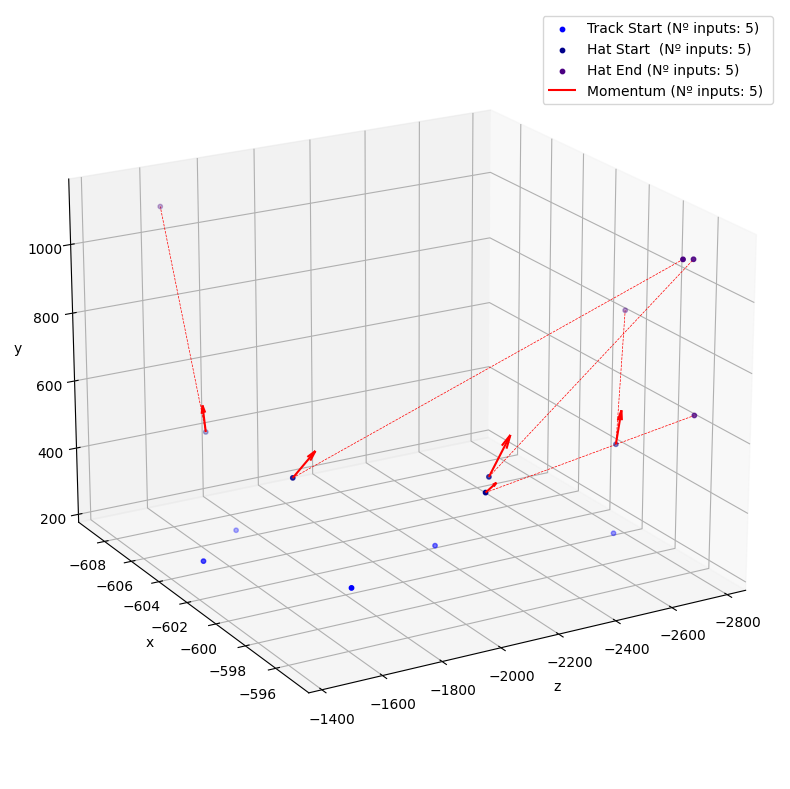

In [89]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)
num_inputs4= len(p_x_list)

# Scatter plot for track_list points with label 'Track'
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})')

# Scatter plot for hat_start_list points with label 'Hat Start'
hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

# Scatter plot for hat_end_list points with label 'Hat End'
hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End (Nº inputs: {num_inputs3})')

# Momentum vectors
arrows=ax.quiver(hat_start_list_z, hat_start_list_x, hat_start_list_y, p_z_list, p_x_list, p_y_list, color='red', length=0.15, label=f'Momentum (Nº inputs: {num_inputs4}) ')

# Lines between'Hat Start' and 'Hat End' points
for x1, y1, z1, x2, y2, z2 in zip(hat_start_list_z, hat_start_list_x, hat_start_list_y, hat_end_list_z, hat_end_list_x, hat_end_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='red', linestyle='dashed',  alpha=1,  linewidth=0.5)

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

# Create a legend based on the labels specified in the scatter plots
ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter,arrows])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.savefig('distrib-mom-lines', dpi=200)

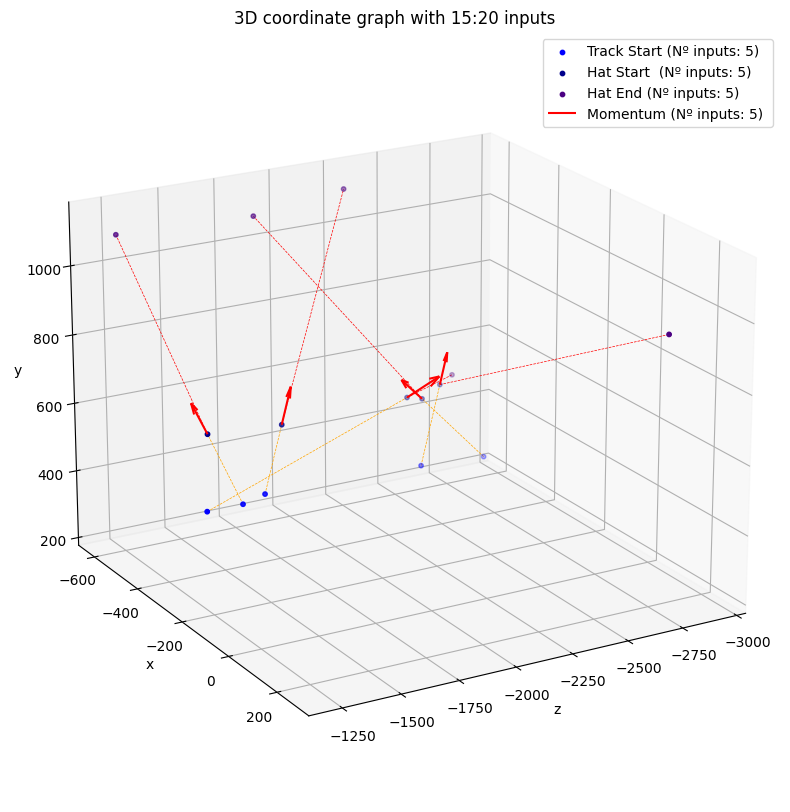

In [112]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

#N_inputs
num_inputs1= len(track_list_z)
num_inputs2= len(hat_start_list_z)
num_inputs3= len(hat_end_list_z)
num_inputs4= len(p_x_list)

# Scatter plot for track_list points with label 'Track'
track_scatter = ax.scatter(track_list_z, track_list_x, track_list_y, c='blue', marker='o', s=10, label=f'Track Start (Nº inputs: {num_inputs1})')

# Scatter plot for hat_start_list points with label 'Hat Start'
hat_start_scatter = ax.scatter(hat_start_list_z, hat_start_list_x, hat_start_list_y, c='darkblue', marker='o', s=10, label=f'Hat Start  (Nº inputs: {num_inputs2})')

# Scatter plot for hat_end_list points with label 'Hat End'
hat_end_scatter = ax.scatter(hat_end_list_z, hat_end_list_x, hat_end_list_y, c='indigo', marker='o', s=10, label=f'Hat End (Nº inputs: {num_inputs3})')

# Momentum vectors
arrows=ax.quiver(hat_start_list_z, hat_start_list_x, hat_start_list_y, p_z_list, p_x_list, p_y_list, color='red', length=0.15, label=f'Momentum (Nº inputs: {num_inputs4}) ')

# Lines between 'Track' and 'Hat Start' points
for x1, y1, z1, x2, y2, z2 in zip(track_list_z, track_list_x, track_list_y, hat_start_list_z, hat_start_list_x, hat_start_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='orange', linestyle='dashed',  alpha=1, linewidth=0.5)

# Lines between'Hat Start' and 'Hat End' points
for x1, y1, z1, x2, y2, z2 in zip(hat_start_list_z, hat_start_list_x, hat_start_list_y, hat_end_list_z, hat_end_list_x, hat_end_list_y):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='red', linestyle='dashed',  alpha=1,  linewidth=0.5)

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

# Create a legend based on the labels specified in the scatter plots
ax.legend(handles=[track_scatter, hat_start_scatter, hat_end_scatter,arrows])

ax.view_init(elev=20, azim=60)

plt.tight_layout()

plt.title(f'3D coordinate graph with 15:20 inputs')

plt.savefig('distrib-mom-lines-15:20 input', dpi=200)